# Exploring the data 
    duplicate data doesnt exist 
    missing values do exist, need to be dealt with according to their data type


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.00

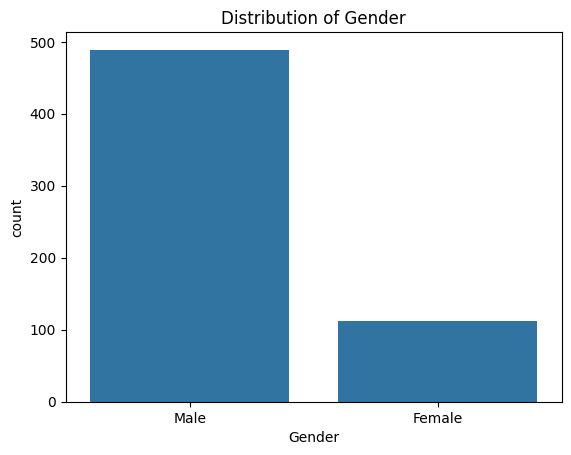

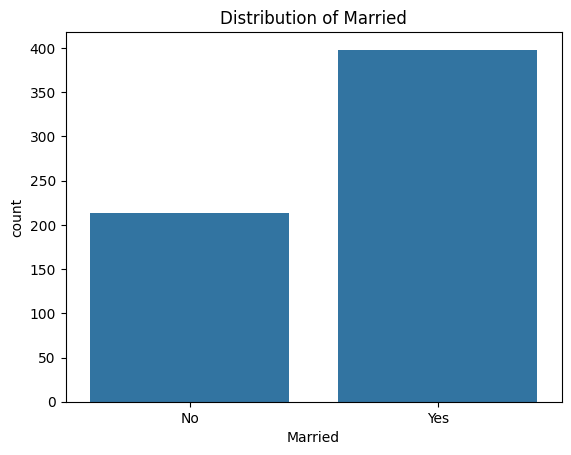

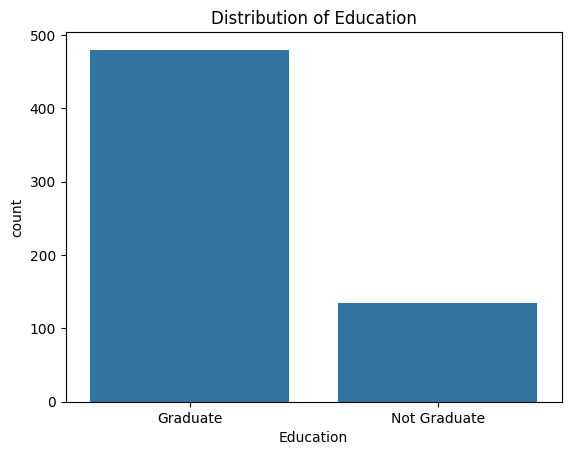

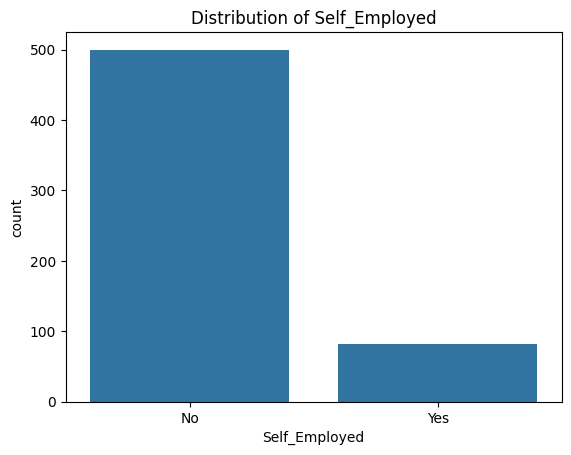

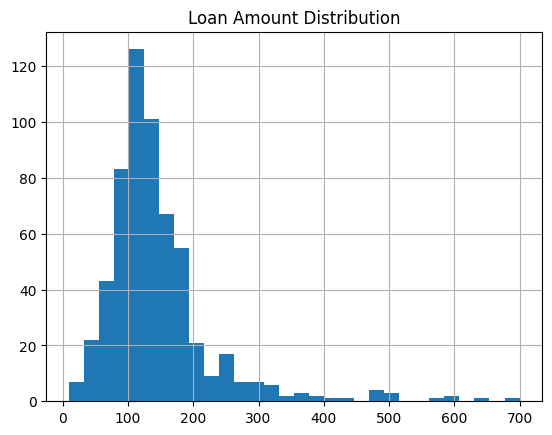

EDA and Cleaning Complete!


C:\Users\livmo\AppData\Local\Temp\ipykernel_18676\669946505.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col] = train_df[col].fillna(train_df[col].mode()[0], inplace=True)
C:\Users\livmo\AppData\Local\Temp\ipykernel_18676\669946505.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2. Load Data ---
train_df = pd.read_csv("C:/Users/livmo/OneDrive - Trinity College Dublin/LoanPrediction/LoanPrediction/data/train.csv")
test_df = pd.read_csv("C:/Users/livmo/OneDrive - Trinity College Dublin/LoanPrediction/LoanPrediction/data/test.csv")

# --- 3. Initial Inspection ---
train_df.head()
train_df.info()
print(train_df.describe())
print(train_df.isna().sum())

# --- 4. Exploratory Data Analysis (EDA) ---
# Target variable distribution

# Categorical variables distribution example
for col in ['Gender', 'Married', 'Education', 'Self_Employed']:
    sns.countplot(x=col, data=train_df)
    plt.title(f"Distribution of {col}")
    plt.show()

# Numerical variables
train_df['LoanAmount'].hist(bins=30)
plt.title("Loan Amount Distribution")
plt.show()

# --- 5. Handle Missing Values ---
# Categorical
for col in ['Gender', 'Married', 'Self_Employed']:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0], inplace=True)

# Numerical
for col in ['LoanAmount', 'Loan_Amount_Term']:
    train_df[col] = train_df[col].fillna(train_df[col].median(), inplace=True)
    test_df[col] = test_df[col].fillna(test_df[col].median(), inplace=True)

# Credit History
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True)

# --- 6. Encode Categorical Variables ---
train_df = pd.get_dummies(train_df, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# --- 7. Save Cleaned Data ---
train_df.to_csv("C:/Users/livmo/OneDrive - Trinity College Dublin/LoanPrediction/LoanPrediction/data/processed/train_clean.csv", index=False)
test_df.to_csv("C:/Users/livmo/OneDrive - Trinity College Dublin/LoanPrediction/LoanPrediction/data/processed/test_clean.csv", index=False)

print("EDA and Cleaning Complete!")





In [12]:
train_df.head()
train_df.info()
print(train_df.describe())
print(train_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Dependents               599 non-null    object 
 2   ApplicantIncome          614 non-null    int64  
 3   CoapplicantIncome        614 non-null    float64
 4   LoanAmount               0 non-null      object 
 5   Loan_Amount_Term         0 non-null      object 
 6   Credit_History           614 non-null    float64
 7   Loan_Status              614 non-null    object 
 8   Education_Not Graduate   614 non-null    bool   
 9   Property_Area_Semiurban  614 non-null    bool   
 10  Property_Area_Urban      614 non-null    bool   
dtypes: bool(3), float64(2), int64(1), object(5)
memory usage: 40.3+ KB
       ApplicantIncome  CoapplicantIncome  Credit_History
count       614.000000         614.000000      614.000000
mean 

Visualising target varibale distribution - Loan Status  

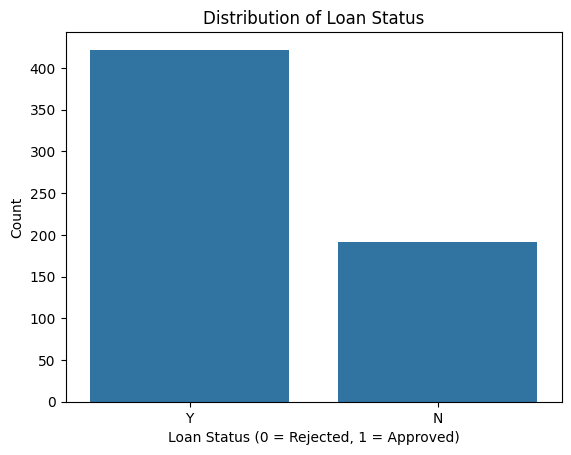

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

In [13]:
# Count the number of approvals vs rejections
sns.countplot(x='Loan_Status', data=train_df)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)')
plt.ylabel('Count')
plt.show()

# --- 8. Visualize target variable distribution
train_df['Loan_Status'].value_counts(normalize=True)
